<a href="https://colab.research.google.com/github/bannis14/Titanic_Survivor_Logistic_Regression_Model/blob/main/Titanic_Survivor_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Portfolio

/content/drive/MyDrive/Business Analyst course/Portfolio


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Load Titanic dataset
tdf = pd.read_csv('titanic.csv')

In [ ]:
# Drop unnecessary column
tdf = tdf.drop(['Name'], axis=1)

In [ ]:
# Create dummy variables
tdf = pd.get_dummies(data=tdf, drop_first=True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Siblings/Spouses Aboard'}>,
        <Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Sex_male'}>, <Axes: >, <Axes: >]],
      dtype=object)

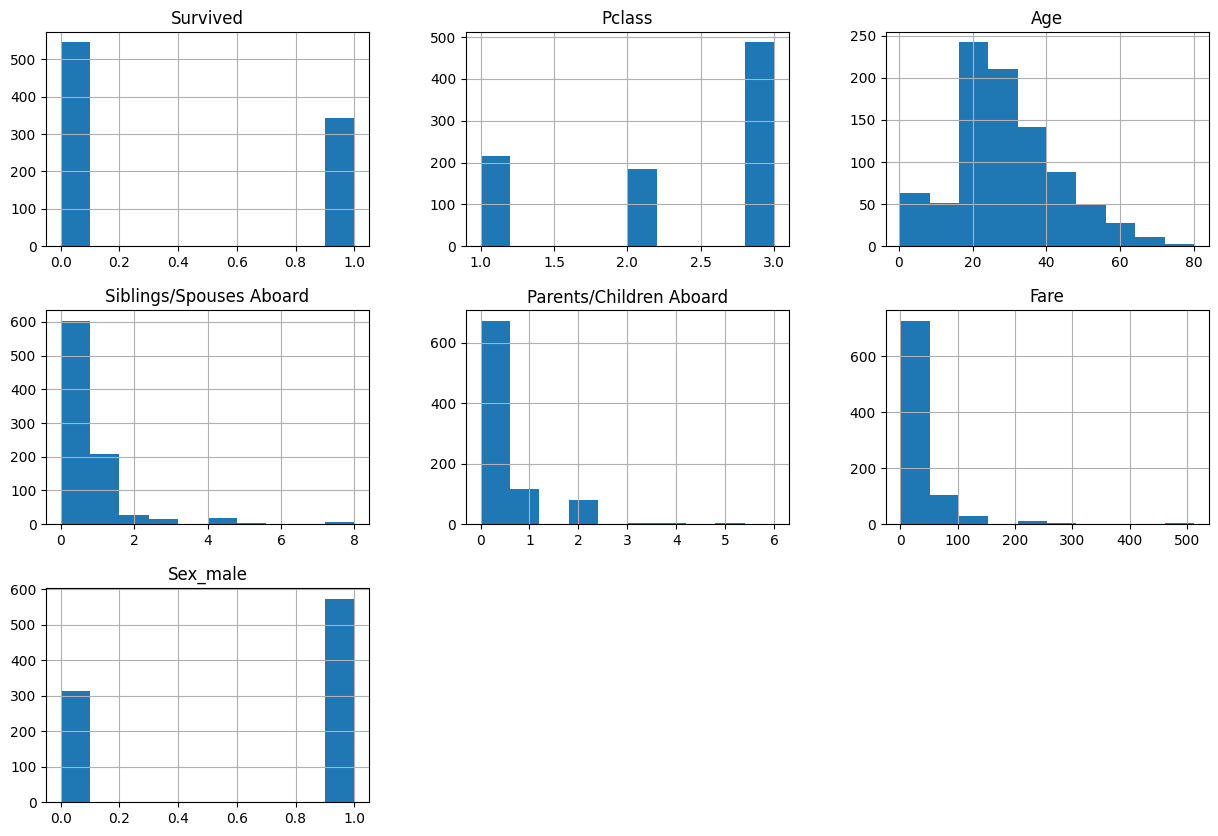

In [ ]:
# Histograms
tdf.hist(figsize=(15, 10))

In [ ]:
# Remove outliers
print(len(tdf))
tdf = tdf[(tdf['Siblings/Spouses Aboard'] < 3.5) & (tdf['Parents/Children Aboard'] < 4.5) & (tdf['Fare'] < 350)]
print(len(tdf))

887
848


<Axes: >

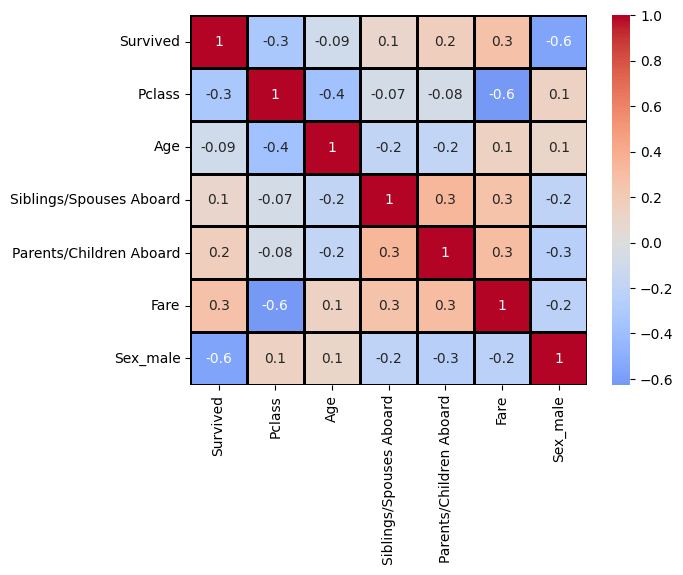

In [ ]:
# Correlation Matrix
sns.heatmap(tdf.corr(), annot=True, fmt="0.1g", center=0, cmap='coolwarm', linewidths=1, linecolor='black')

In [ ]:
# Split the Data
X = tdf.drop(['Survived'], axis=1)
y = tdf['Survived']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

In [ ]:
# Logistic Model
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.438895
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  678
Model:                          Logit   Df Residuals:                      671
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Sep 2023   Pseudo R-squ.:                  0.3511
Time:                        19:28:46   Log-Likelihood:                -297.57
converged:                       True   LL-Null:                       -458.55
Covariance Type:            nonrobust   LLR p-value:                 1.605e-66
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.3606      0.669      8.017      0.000       4.050   

In [ ]:
# Make predictions and assess the model
y_preds = model.predict(X_test)
y_preds = np.where(y_preds > 0.5, 1, 0)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       112
           1       0.66      0.74      0.70        58

    accuracy                           0.78       170
   macro avg       0.76      0.77      0.76       170
weighted avg       0.79      0.78      0.79       170

